In [1]:
import sys
sys.path.append("..")

In [2]:
from hpst.dataset.heterogenous_sparse_sim_dataset import HeterogenousSparseDataset
import torch
import torchvision.transforms.functional as F
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset = HeterogenousSparseDataset("../data/", limit_index=(0.0,1.0))

loading files


100%|██████████████| 400/400 [1:23:05<00:00, 12.46s/it]


processing file
torch.Size([17841532])
tensor(0) tensor(5)
tensor([ 1567158, 13552153,   473117,   430859,  1593887,   224364,        1,
               1])


In [5]:
from pathlib import Path

In [6]:
dataset.hits_index[1:], dataset.hits_index[:-1]

(tensor([    0,     0,     0,  ..., 19999, 19999, 19999], dtype=torch.int32),
 tensor([    0,     0,     0,  ..., 19999, 19999, 19999], dtype=torch.int32))

In [7]:
torch.where(~((dataset.hits_index[:-1] == dataset.hits_index[1:]) | (dataset.hits_index[:-1] == dataset.hits_index[1:]-1)))

(tensor([  622536,   723950,   903177,  1171754,  1282593,  1897389,  2928859,
          3460493,  5188641,  5867662,  6521043,  6617798,  7180343, 12120810,
         12151477, 14121166, 14180239, 16055418, 16327537, 16519298, 16773584,
         16842357, 17575733]),)

In [8]:
dataset.hitlim_lo[243]

tensor(162392)

In [9]:
dataset.hits_index.max()

tensor(19999, dtype=torch.int32)

In [10]:
dataset.hits_index

tensor([    0,     0,     0,  ..., 19999, 19999, 19999], dtype=torch.int32)

In [11]:
i = 58461//100
dataset.hits_index[i * 100:(i+2) * 100]

tensor([86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86,
        86, 86], dtype=torch.int32)

In [12]:
hits_index, (
            features_x,
            coordinates_x,
            targets_x,
            object_targets_x
        ) = dataset[244]

In [13]:
object_targets_x

tensor([209, 211, 210,  ..., 410, 414, 412])

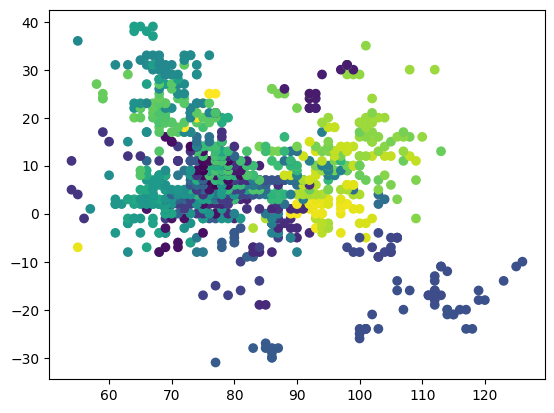

In [14]:
plt.scatter(coordinates_x.numpy()[:,2], coordinates_x.numpy()[:,0], c=object_targets_x)

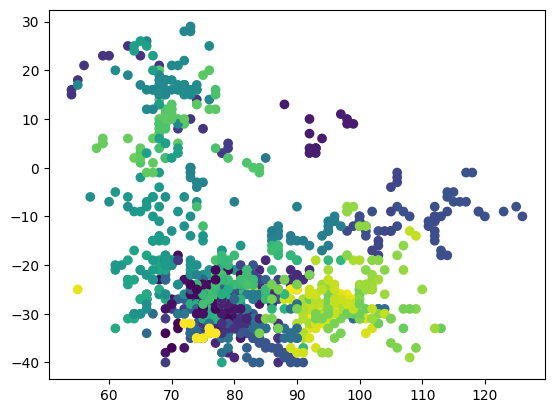

In [15]:
plt.scatter(coordinates_x.numpy()[:,2], coordinates_x.numpy()[:,1], c=object_targets_x)

In [16]:
coordinates_x = coordinates_x - coordinates_x.amin(dim=0, keepdims=True)

In [17]:
coordinates_x

tensor([[ 0.,  9., 23.],
        [ 1., 12., 32.],
        [ 1., 13., 32.],
        ...,
        [70., 63., 13.],
        [70., 64., 10.],
        [70., 66., 11.]])

In [18]:
sizes = coordinates_x.amax(dim=0)

In [19]:
mat_x = torch.sparse_coo_tensor(
        coordinates_x.T[[2,0],:],
        object_targets_x+1,
        size=(sizes[[2,0]] + 1).to(int).tolist()
    ).to_dense()

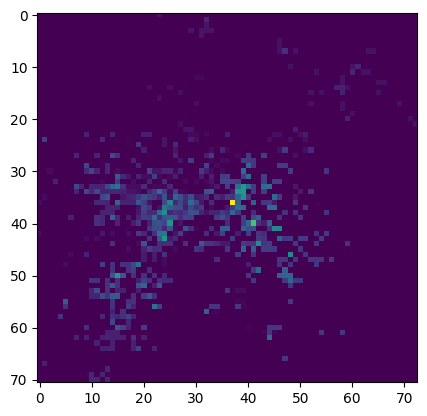

In [20]:
plt.imshow(mat_x.numpy().T)

In [21]:
feat_mat_x = torch.sparse_coo_tensor(
        coordinates_x.T[[2,0],:],
        features_x.squeeze(-1),
        size=(sizes[[2,0]] + 1).to(int).tolist()
    ).to_dense()

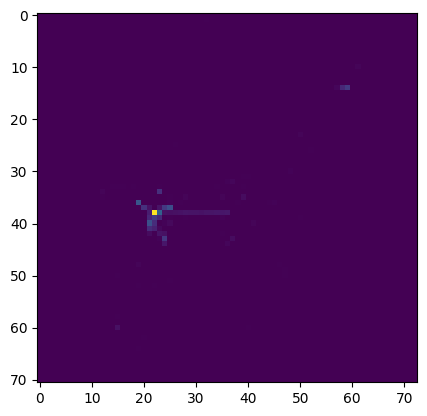

In [22]:
plt.imshow(feat_mat_x.T)

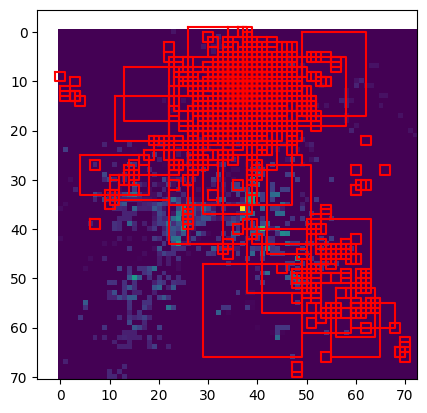

In [23]:
fig, ax = plt.subplots()
ax.imshow(mat_x.T)
for i in object_targets_x.unique():
    coords = coordinates_x[object_targets_x == i]
    lo = coords.amin(dim=0)-1
    hi = coords.amax(dim=0)+1
    
    #rect = patches.Rectangle((lo[0], lo[1]), hi[0]-lo[0], hi[1]-lo[1], linewidth=1, edgecolor='r', facecolor='none')
    #ax.add_patch(rect)
    xs = [lo[0], hi[0], hi[0], lo[0], lo[0]]
    ys = [lo[1], lo[1], hi[1], hi[1], lo[1]]
    ax.plot(xs, ys, color="red")

plt.show()

In [24]:
hits_index

244